In [52]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
file = "covid_analytics_clinical_data.csv"
COVID_data_file = pd.read_csv(file)

In [54]:
COVID_data_file.info(max_cols = 112)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
Patient ID                                               5644 non-null object
Patient age quantile                                     5644 non-null int64
SARS-Cov-2 exam result                                   5644 non-null object
Patient addmited to regular ward (1=yes, 0=no)           5644 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    5644 non-null int64
Hematocrit                                               603 non-null float64
Hemoglobin                                               603 non-null float64
Platelets                                                602 non-null float64
Mean platelet volume                                     599 non-null float64
Red blood Cells                                          602 non-null float64
Lymphocytes                           

In [55]:
COVID_data = COVID_data_file.dropna(subset=["Hemoglobin"])
COVID_data = COVID_data.drop(["Albumin", "D-Dimer", "Vitamin B12", "Mycoplasma pneumoniae",
                              "Fio2 (venous blood gas analysis)", "Myeloblasts", "Urine - Sugar", "Prothrombin time (PT), Activity", "Partial thromboplastin time (PTT) "], axis=1)

In [56]:
COVID_data.info(max_cols = 112)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 5643
Data columns (total 102 columns):
Patient ID                                               603 non-null object
Patient age quantile                                     603 non-null int64
SARS-Cov-2 exam result                                   603 non-null object
Patient addmited to regular ward (1=yes, 0=no)           603 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    603 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    603 non-null int64
Hematocrit                                               603 non-null float64
Hemoglobin                                               603 non-null float64
Platelets                                                602 non-null float64
Mean platelet volume                                     599 non-null float64
Red blood Cells                                          602 non-null float64
Lymphocytes                                  

In [57]:
print('total positive tests:',len([i for i in COVID_data_file["SARS-Cov-2 exam result"] if i=="positive"]))
print('positive tests with blood data:',len([i for i in COVID_data["SARS-Cov-2 exam result"] if i=="positive"]))

total positive tests: 558
positive tests with blood data: 83


In [58]:
COVID_data.loc[:,"Patient ID":"Proteina C reativa mg/dL"]

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.127395,-0.067309,-0.286986
15,6c9d3323975b082,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.880570,-0.811643,NaN
18,d3ea751f3db9de9,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.265957,NaN,-0.487674
22,2c2eae16c12a18a,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.422410,-1.332677,NaN
28,fc41531ca4faf1e,13,negative,0,0,0,1.014726,0.854844,-0.178244,0.796029,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.651115,-0.737209,-0.434025
29,891d0f6449ff3d7,14,negative,0,0,0,0.740064,0.854844,0.361914,-0.550290,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.347905,-0.141742,-0.529401
30,ebdd7c67fcb21b4,9,negative,1,0,0,-0.679027,-0.711556,0.952319,-0.886869,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.782232,-0.439476,0.545572
32,296adf066a9bf03,8,negative,0,0,0,0.236515,0.040316,0.072992,0.571643,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-1.012439,-0.513909,NaN
34,0b1e43c5e3fb1d1,17,negative,0,0,0,0.808730,1.042812,-0.278739,1.581381,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.470828,NaN,-0.360505


In [77]:
COVID_data["result"] = COVID_data["SARS-Cov-2 exam result"].map({'positive': 1, 'negative': 0})
#COVID_data[["result", "SARS-Cov-2 exam result"]]

In [60]:
corr_matrix = COVID_data.corr()
#corr_matrix["result"].sort_values(ascending=False)
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


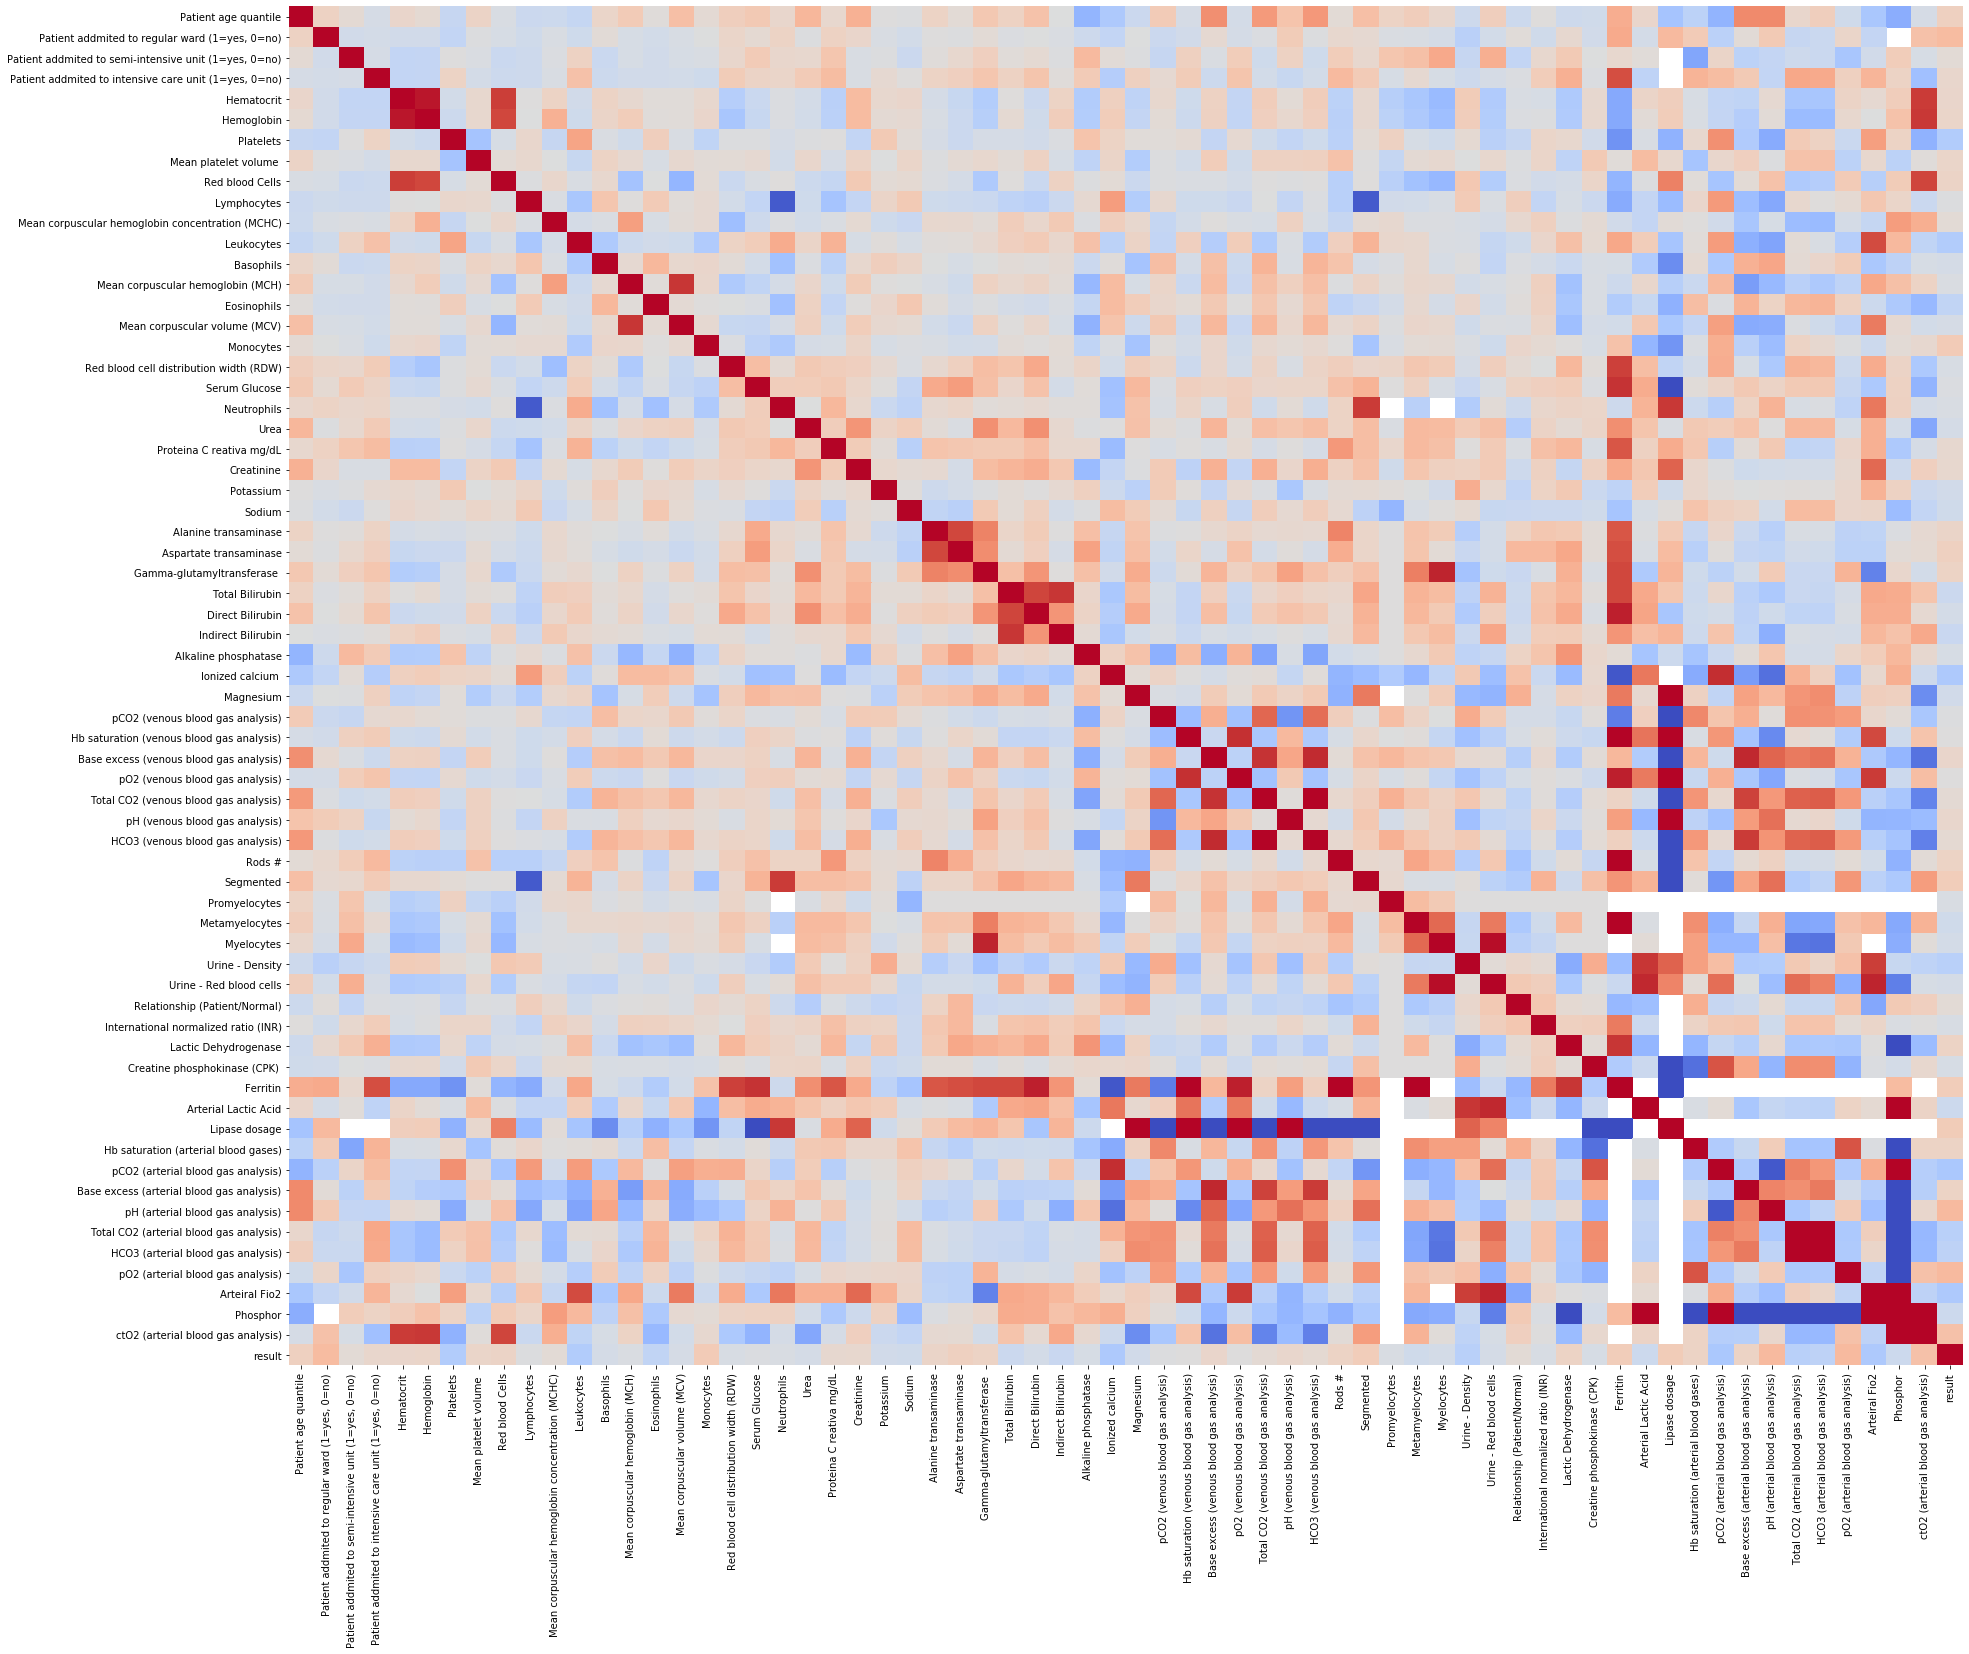

In [61]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr_matrix, annot=False, cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix.pdf', bbox_inches='tight', pad_inches=0.0)

In [62]:
columns = [column for column in COVID_data if COVID_data[column].count()>300]
COVID_data_300 = COVID_data[columns]
COVID_data_300.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 5643
Data columns (total 44 columns):
Patient ID                                               603 non-null object
Patient age quantile                                     603 non-null int64
SARS-Cov-2 exam result                                   603 non-null object
Patient addmited to regular ward (1=yes, 0=no)           603 non-null int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    603 non-null int64
Patient addmited to intensive care unit (1=yes, 0=no)    603 non-null int64
Hematocrit                                               603 non-null float64
Hemoglobin                                               603 non-null float64
Platelets                                                602 non-null float64
Mean platelet volume                                     599 non-null float64
Red blood Cells                                          602 non-null float64
Lymphocytes                                   

In [63]:
corr_matrix_300 = COVID_data_300.corr()
corr_matrix_300.style.background_gradient(cmap='coolwarm').set_precision(2)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,result
Patient age quantile,1,0.14,0.051,-0.057,0.097,0.06,-0.16,0.12,-0.038,-0.13,-0.12,-0.17,0.11,0.2,0.022,0.28,0.051,0.17,0.087,0.34,0.084,0.37,0.0058,-0.015,0.15
"Patient addmited to regular ward (1=yes, 0=no)",0.14,1,-0.089,-0.073,-0.087,-0.092,-0.18,-0.013,-0.053,-0.095,-0.035,-0.1,0.032,-0.051,-0.086,-0.039,-0.00035,0.1,0.13,-0.01,0.14,0.097,-0.032,-0.079,0.31
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.051,-0.089,1,-0.062,-0.18,-0.18,0.007,-0.023,-0.14,-0.11,-0.023,0.14,-0.13,-0.054,-0.09,-0.051,-0.038,0.092,0.087,0.082,0.24,-0.035,-0.013,-0.13,0.042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.057,-0.073,-0.062,1,-0.18,-0.18,0.13,-0.074,-0.12,-0.11,-0.036,0.27,-0.12,-0.09,-0.089,-0.078,-0.1,0.19,0.1,0.2,0.3,-0.038,0.067,0.015,0.09
Hematocrit,0.097,-0.087,-0.18,-0.18,1,0.97,-0.082,0.084,0.87,0.002,0.13,-0.09,0.13,0.075,0.03,0.025,0.082,-0.26,-0.017,-0.071,-0.24,0.31,0.078,0.099,0.099
Hemoglobin,0.06,-0.092,-0.18,-0.18,0.97,1,-0.12,0.079,0.84,-0.0041,0.37,-0.1,0.12,0.18,0.019,0.028,0.095,-0.34,-0.021,-0.084,-0.23,0.31,0.05,0.063,0.1
Platelets,-0.16,-0.18,0.007,0.13,-0.082,-0.12,1,-0.36,-0.055,0.091,-0.16,0.44,-0.026,-0.1,0.17,-0.034,-0.2,-0.0082,-0.058,-0.013,0.0044,-0.18,0.2,0.038,-0.28
Mean platelet volume,0.12,-0.013,-0.023,-0.074,0.084,0.079,-0.36,1,0.043,0.079,-0.004,-0.15,0.13,0.069,-0.047,0.078,0.038,0.045,-0.081,0.093,-0.062,0.12,-0.0043,0.11,0.11
Red blood Cells,-0.038,-0.053,-0.14,-0.12,0.87,0.84,-0.055,0.043,1,-0.0098,0.09,-0.036,0.079,-0.37,-0.0044,-0.46,0.045,-0.14,0.013,-0.12,-0.17,0.21,0.042,0.06,0.12
Lymphocytes,-0.13,-0.095,-0.11,-0.11,0.002,-0.0041,0.091,0.079,-0.0098,1,-0.028,-0.33,0.23,0.015,0.2,0.027,0.065,-0.08,-0.93,-0.11,-0.36,-0.18,0.11,0.21,-0.015


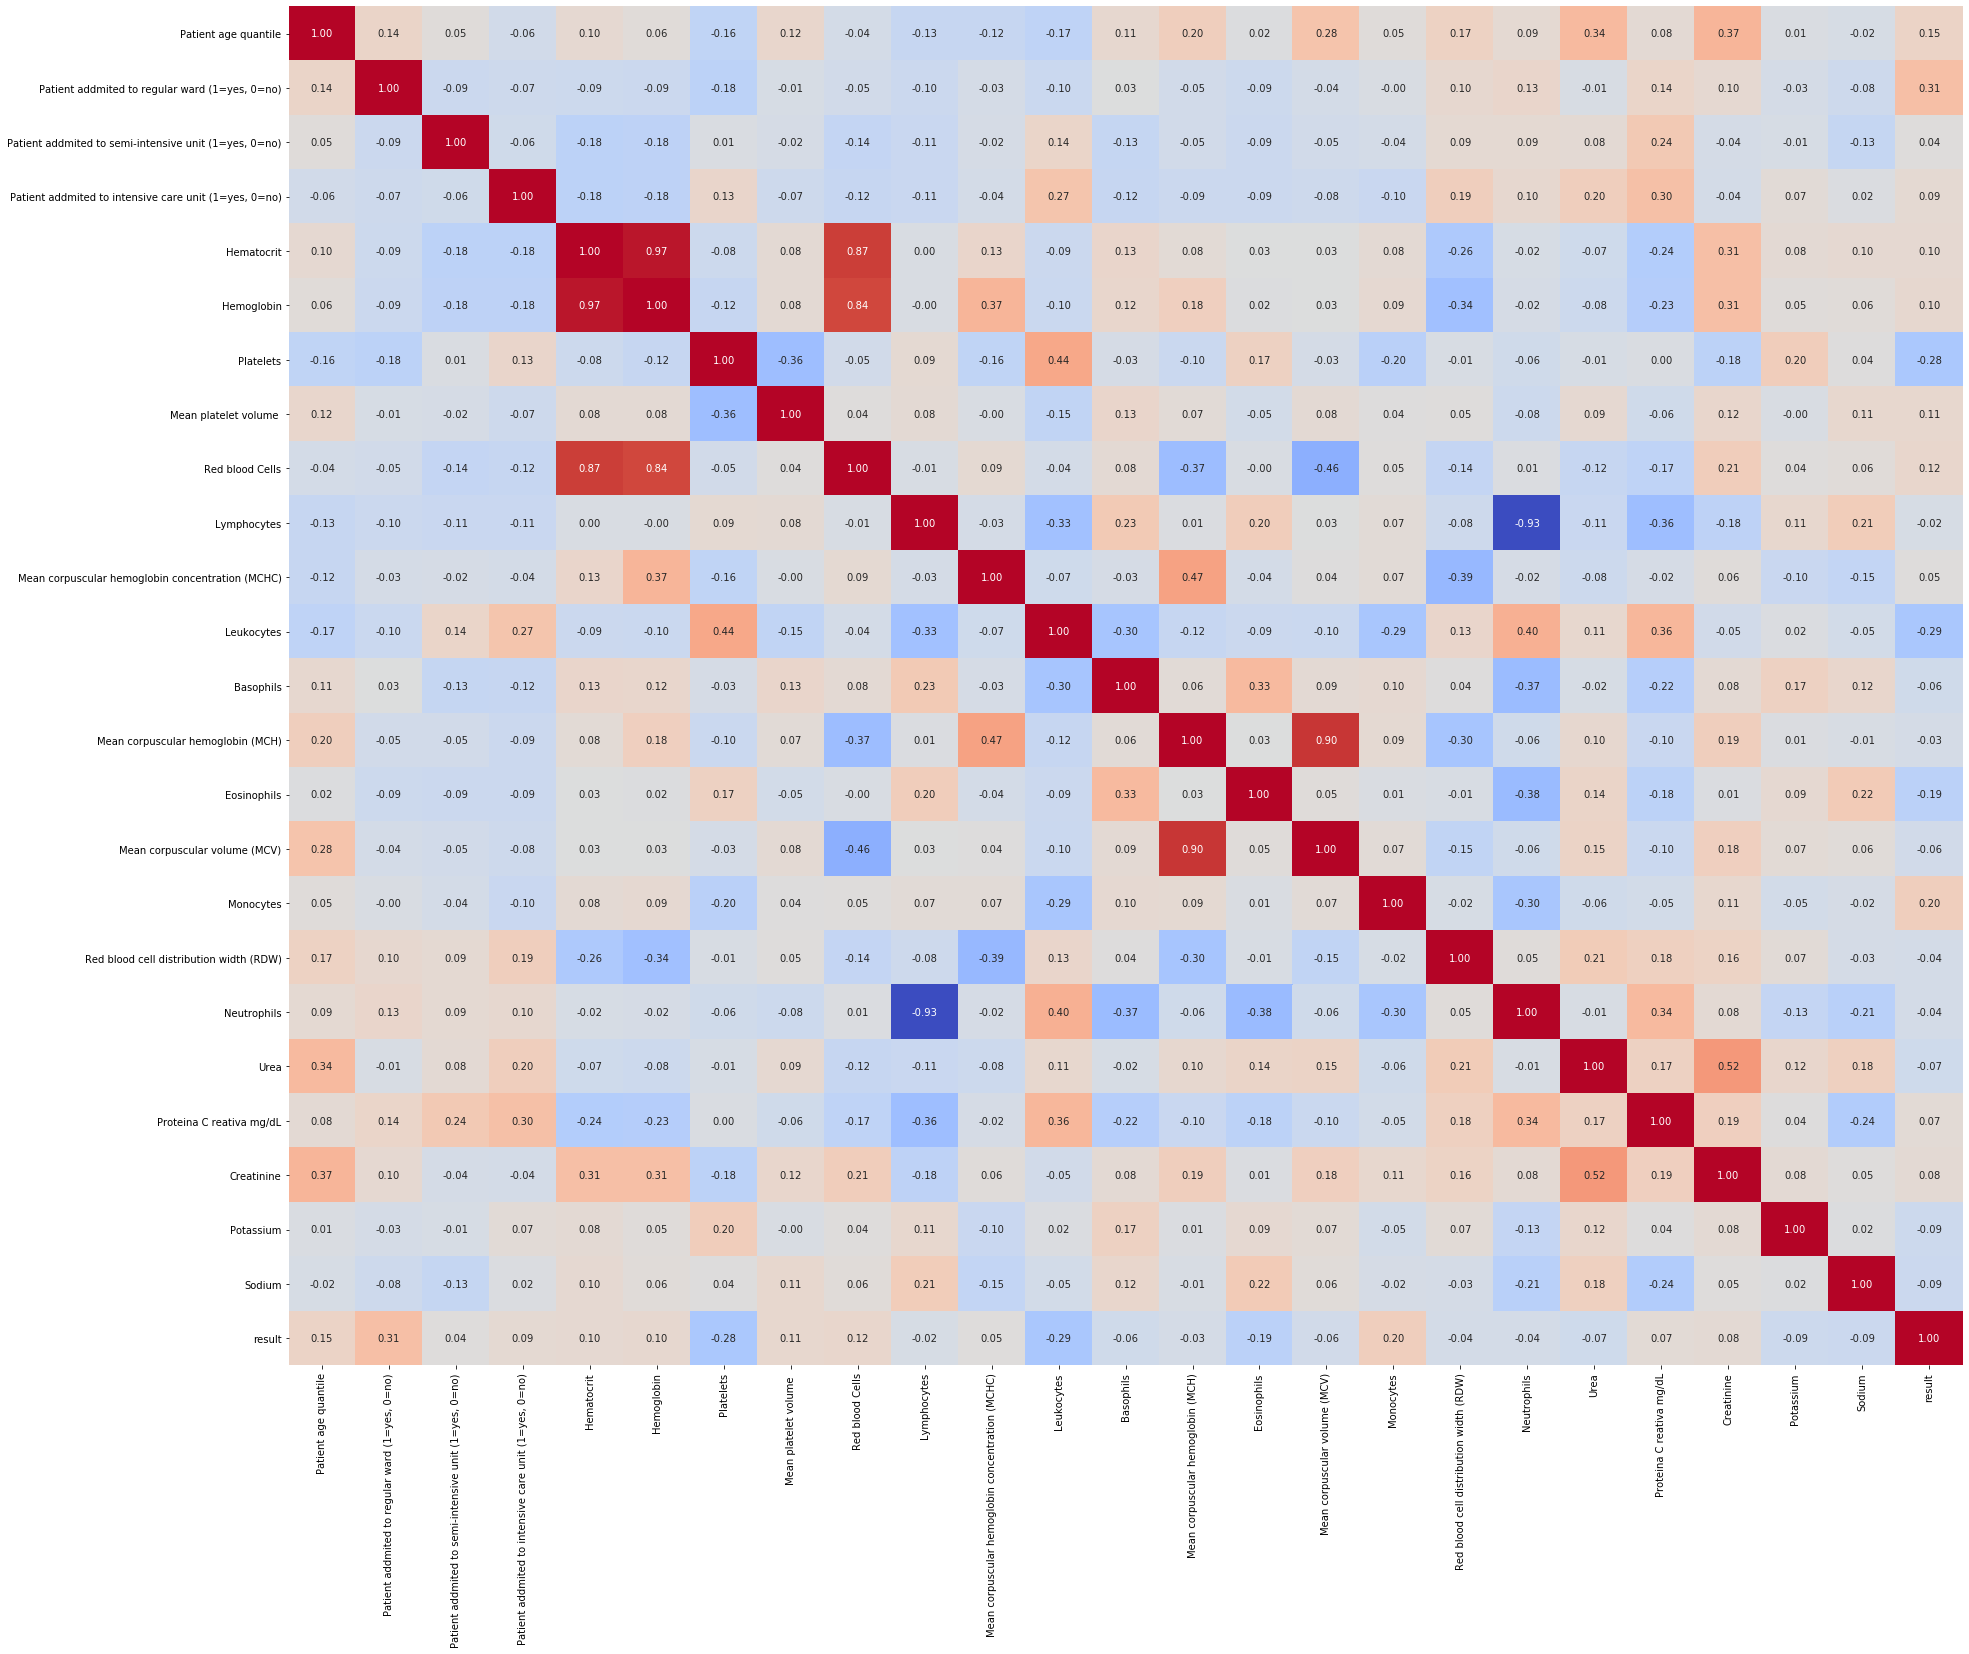

In [64]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr_matrix_300, annot=True, fmt='.2f' , cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix_300.pdf', bbox_inches='tight', pad_inches=0.0)

In [80]:
best_variables = ["Patient age quantile", 
                  "Hemoglobin",
                  "Platelets", 
                  "Red blood Cells",
                  "Mean corpuscular hemoglobin concentration (MCHC)",
                  "Mean corpuscular hemoglobin (MCH)",
                  "Red blood cell distribution width (RDW)",
                  "Mean corpuscular volume (MCV)",
                  "Lymphocytes",
                  "Leukocytes",
                  "Monocytes",
                  "Basophils",
                  "Eosinophils",
                  "Proteina C reativa mg/dL"]

test_results = ["result"]

my_variables = test_results + best_variables + ["Hematocrit", 
                                                "Mean platelet volume ",
                                                "Neutrophils",
                                                "Urea",
                                                "Creatinine",
                                                "Potassium",
                                                "Sodium"]

In [81]:
COVID_my_variables = COVID_data[my_variables].copy()
COVID_my_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 5643
Data columns (total 22 columns):
result                                              603 non-null int64
Patient age quantile                                603 non-null int64
Hemoglobin                                          603 non-null float64
Platelets                                           602 non-null float64
Red blood Cells                                     602 non-null float64
Mean corpuscular hemoglobin concentration (MCHC)    602 non-null float64
Mean corpuscular hemoglobin (MCH)                   602 non-null float64
Red blood cell distribution width (RDW)             602 non-null float64
Mean corpuscular volume (MCV)                       602 non-null float64
Lymphocytes                                         602 non-null float64
Leukocytes                                          602 non-null float64
Monocytes                                           601 non-null float64
Basophils             

In [84]:
from sklearn.model_selection import train_test_split, StratifiedKFold

pos_devIndeces, pos_testIndeces = \
                train_test_split([i for i in COVID_my_variables[(COVID_my_variables.result == 1)].index.tolist()],
                                 test_size=0.2, random_state=1337)
neg_devIndeces, neg_testIndeces = \
                train_test_split([i for i in COVID_my_variables[(COVID_my_variables.result == 0)].index.tolist()],
                                 test_size=0.2, random_state=1337)

[568,
 5258,
 5553,
 4470,
 5250,
 5092,
 3184,
 5145,
 4680,
 2993,
 3210,
 5169,
 4899,
 5038,
 4957,
 5016,
 5201,
 4980,
 4646,
 5341,
 5017,
 4964,
 3057,
 5204,
 5111,
 5004,
 4897,
 5002,
 5223,
 4510,
 3302,
 5585,
 5022,
 5165,
 5259,
 2722,
 4863,
 4769,
 1293,
 5540,
 5260,
 1624,
 5256,
 1966,
 3818,
 1162,
 5196,
 5115,
 3779,
 5208,
 5230,
 5248,
 4346,
 5524,
 4524,
 884,
 4459,
 5643,
 5161,
 1615,
 2205,
 5329,
 5566,
 4978,
 5210,
 4425]

In [67]:
def impute_with_median (df):
    """Iterate through columns of Pandas DataFrame.
    Where NaNs exist replace with median"""
    
    # Get list of DataFrame column names
    cols = list(df)
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df

In [68]:
COVID_my_variables = impute_with_median(COVID_my_variables)
COVID_my_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 5643
Data columns (total 21 columns):
Patient age quantile                                603 non-null int64
Hemoglobin                                          603 non-null float64
Platelets                                           603 non-null float64
Red blood Cells                                     603 non-null float64
Mean corpuscular hemoglobin concentration (MCHC)    603 non-null float64
Mean corpuscular hemoglobin (MCH)                   603 non-null float64
Red blood cell distribution width (RDW)             603 non-null float64
Mean corpuscular volume (MCV)                       603 non-null float64
Lymphocytes                                         603 non-null float64
Leukocytes                                          603 non-null float64
Monocytes                                           603 non-null float64
Basophils                                           603 non-null float64
Eosinophils         

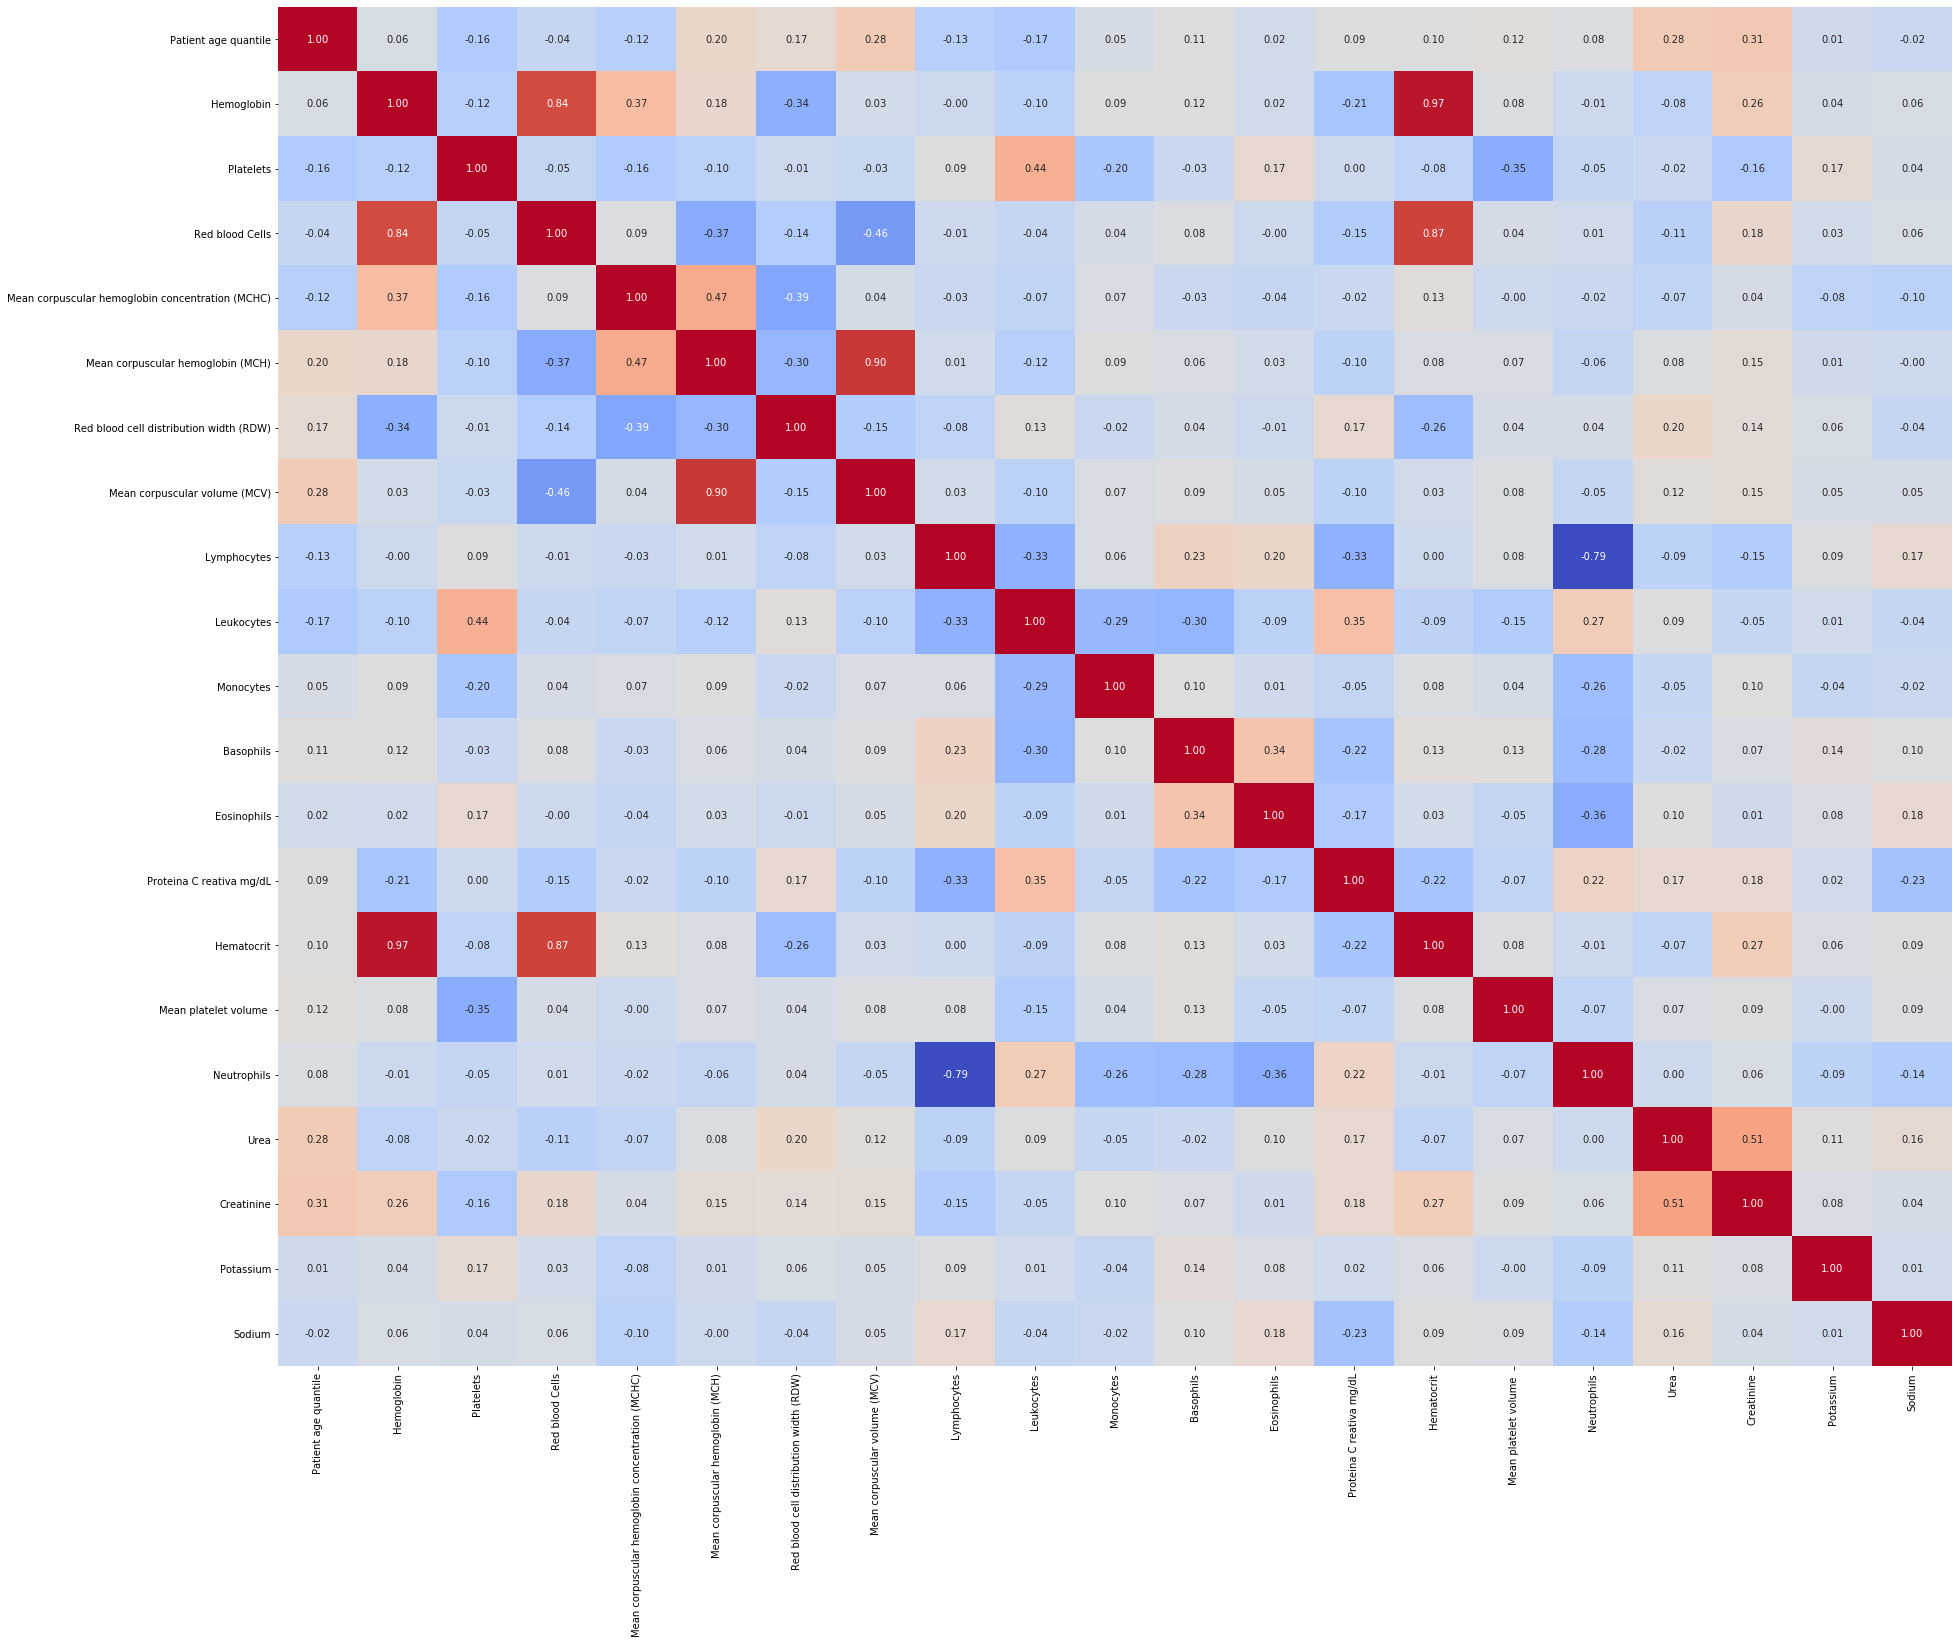

In [69]:
corr_matrix_my_variables = COVID_my_variables.corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr_matrix_my_variables, annot=True, fmt='.2f' , cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix_my_variables.pdf', bbox_inches='tight', pad_inches=0.0)

In [2]:
COVID_my_variables[my_variables].hist(figsize=(20,15))

NameError: name 'COVID_my_variables' is not defined

In [71]:
def getPreProcPipe(normIn=False, pca=False, pcaN=False, whiten=False):
    stepsIn = []
    
    if not normIn and not pca:
        stepsIn.append(('ident', StandardScaler(with_mean=False, with_std=False))) #For compatability
        
    else:
        if pca:
            stepsIn.append(('pca', PCA(n_components=pcaN, whiten=whiten)))
            
        if normIn:
            stepsIn.append(('normPCA', StandardScaler()))
            
    return Pipeline(stepsIn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb32d48af90>,
      dtype=object)

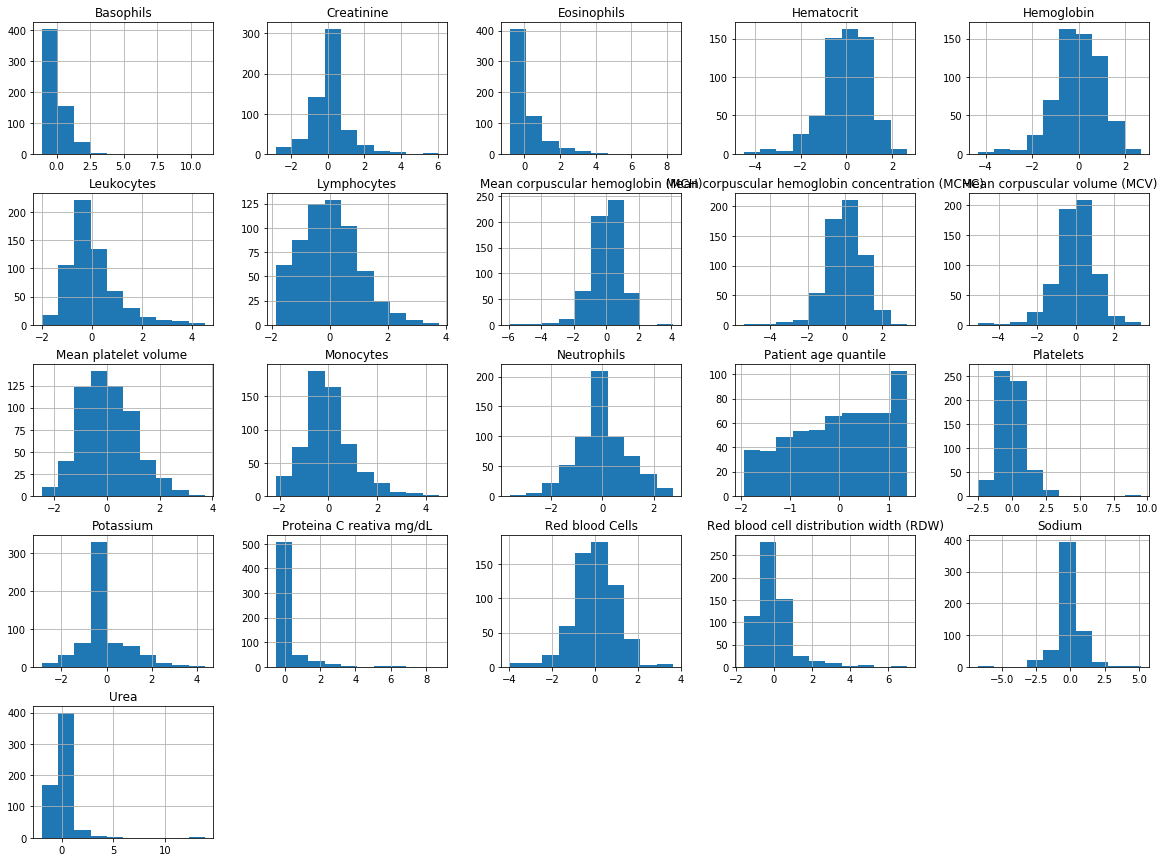

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

COVID_my_variables_tr = num_pipeline.fit_transform(COVID_my_variables)
a = pd.DataFrame(COVID_my_variables_tr, columns=COVID_my_variables.columns, index=COVID_my_variables.index)
a[my_variables].hist(figsize=(20,15))